In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

<h1 style="font-size:40px;">1. Data Understanding & Cleaning</h1>

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

#drop unnecessary column
df = df.drop(columns=['customerID'])

In [56]:
#change TotalCharges to float
df["TotalCharges"] = df["TotalCharges"].astype(float)


categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

# Get unique values for each categorical column
cat_unique_values = {col: df[col].unique().tolist() for col in categorical_cols}
cat_unique_values

Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
df.head()
    

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#select features and target variable
X = df.drop(columns=[ "Churn"])
y = df["Churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
cluster_features = ["MonthlyCharges", "tenure", "Contract"]
df_cluster = df[cluster_features]


# Standardize features
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

<h1 style="font-size:40px;">2. Unsupervised Learning (K-means)</h1>

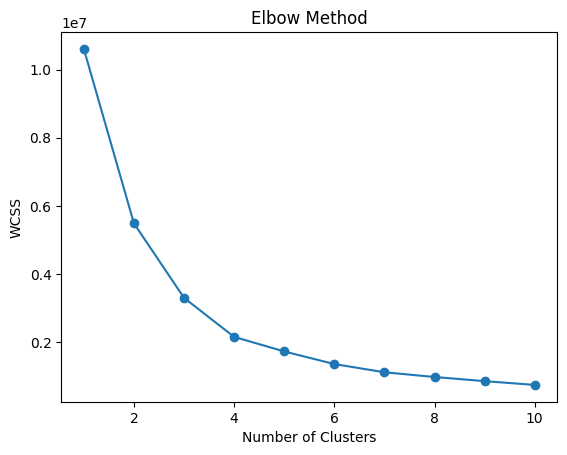

In [60]:
# Elbow Method to find optimal clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [ ]:
#kmeans clustering
# Using 9 clusters based on the elbow method
kmeans = KMeans(n_clusters=9, random_state=0, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_cluster)

# Cluster characteristics
print(df.groupby("Cluster")[["MonthlyCharges", "tenure"]].mean())
print(df.groupby("Cluster")["Contract"].value_counts(normalize=True))

         MonthlyCharges     tenure
Cluster                           
0             22.314454   7.304348
1             71.879746  62.266043
2             81.223217   7.522979
3             25.090996  62.567050
4             93.497190  31.678899
5             23.812402  34.031250
6             60.974727  33.969091
7            102.508546  62.979371
8             51.209254   7.461980
Cluster  Contract
0        0           0.729730
         1           0.168038
         2           0.102233
1        2           0.565508
         1           0.284759
         0           0.149733
2        0           0.963550
         1           0.029319
         2           0.007132
3        2           0.766284
         1           0.185824
         0           0.047893
4        0           0.737385
         1           0.209862
         2           0.052752
5        2           0.382812
         1           0.376953
         0           0.240234
6        0           0.534545
         1           0.3763

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


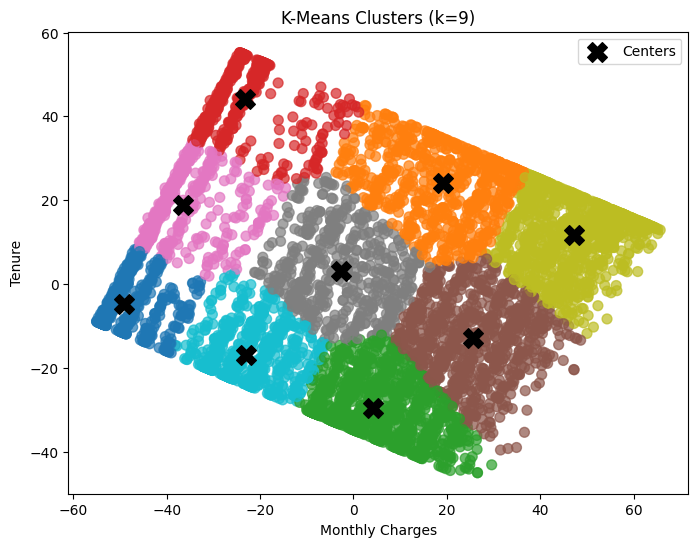

In [ ]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cluster)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    df_pca[:, 0], df_pca[:, 1],
    c=df['Cluster'], cmap='tab10', s=50, alpha=0.7
)

# Mark cluster centers
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c='black', marker='X', s=200, label='Centers'
)

plt.title("K-Means Clusters (k=9)")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.legend()
plt.show()

Cluster 0: Low tenure, high monthly charges, mostly month-to-month contracts → High churn risk.

Cluster 1: Long tenure, low monthly charges, mostly two-year contracts → Very low churn risk.

Cluster 2: Medium tenure, high monthly charges, mixed contracts → Moderate churn risk.

Cluster 3: Very low tenure, low monthly charges, mostly month-to-month contracts → High churn risk (likely new customers still exploring options).

Cluster 4: Long tenure, medium monthly charges, mostly one-year contracts → Low churn risk.

Cluster 5: Medium tenure, low monthly charges, mixed contracts → Low to moderate churn risk.

Cluster 6: High tenure, high monthly charges, mostly two-year contracts → Very low churn risk (loyal but premium-paying customers).

Cluster 7: Short tenure, medium monthly charges, mostly month-to-month contracts → Moderate to high churn risk.




<h1 style="font-size:40px;">3. Supervised Learning</h1>

In [63]:
#logistics reg
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [64]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
# Predictions
y_pred_log = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)


Logistic Regression Results:
Accuracy: 0.7990521327014218
Precision: 0.6433260393873085
Recall: 0.5297297297297298
F1 Score: 0.5810276679841897

Random Forest Results:
Accuracy: 0.790521327014218
Precision: 0.6317016317016317
Recall: 0.4882882882882883
F1 Score: 0.5508130081300813


<h1 style="font-size:40px;">4. Storytelling with Data</h1>

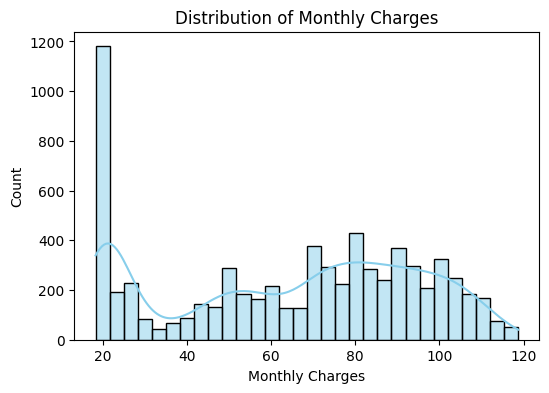

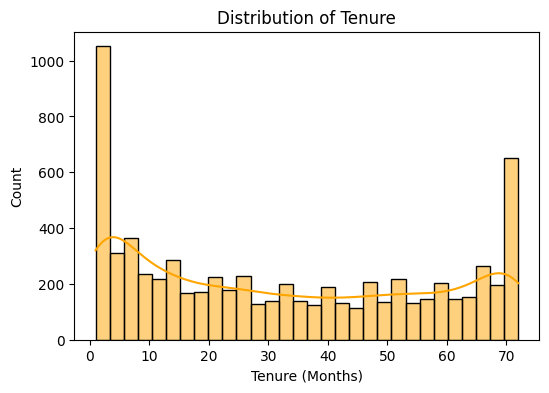

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9724\1628705146.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Churn', data=cluster_churn, palette='viridis')


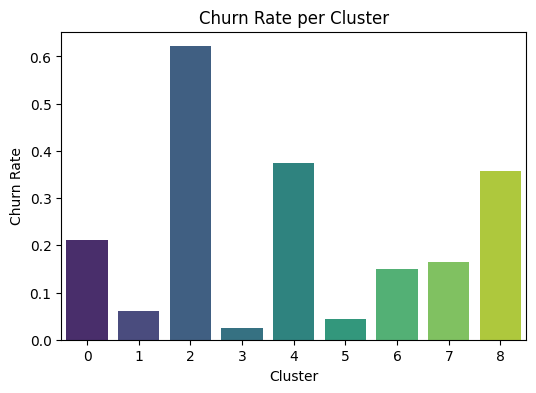

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9724\1628705146.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')


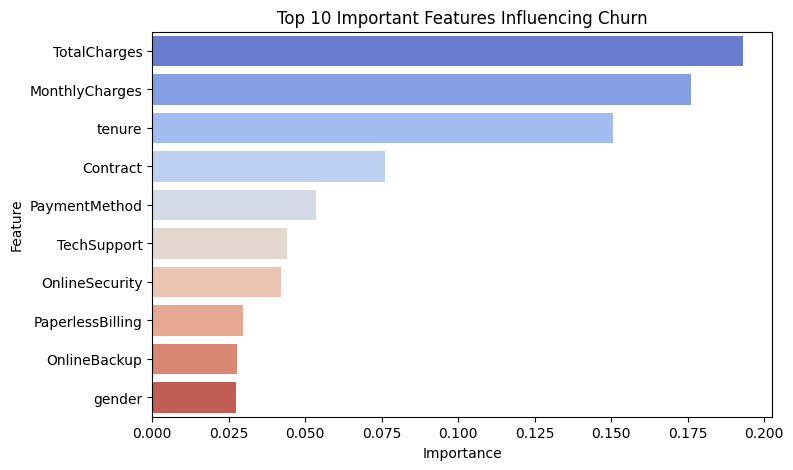

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9724\1628705146.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df, palette='mako')


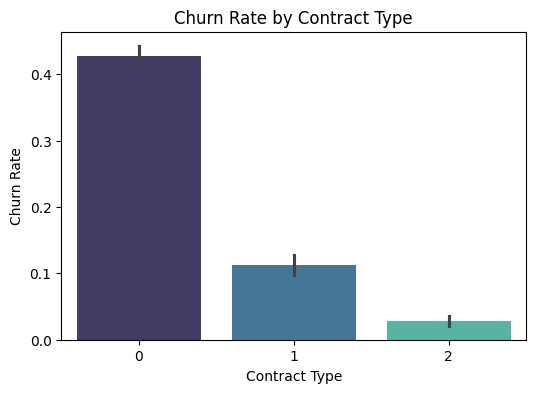

In [66]:
# 1. Distribution of Monthly Charges
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Tenure
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=30, kde=True, color='orange')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

# 3. Churn rate per cluster
cluster_churn = df.groupby('Cluster')['Churn'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Cluster', y='Churn', data=cluster_churn, palette='viridis')
plt.title('Churn Rate per Cluster')
plt.ylabel('Churn Rate')
plt.xlabel('Cluster')
plt.show()

# 4. Feature importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')
plt.title('Top 10 Important Features Influencing Churn')
plt.show()

# 5. Churn by Contract Type
plt.figure(figsize=(6,4))
sns.barplot(x='Contract', y='Churn', data=df, palette='mako')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.show()

1. Customer Spending Patterns – Most customers are clustered between $20–$90 in monthly charges, with a smaller group paying over $100. This suggests a mixed customer base in terms of service packages.

2. Tenure Insights – A large portion of customers have short tenures (under 12 months), which is often associated with higher churn. Long-term customers are fewer but more loyal.

3. Cluster-based Churn Risks – Churn rates vary significantly across the 8 clusters. For example, Cluster 0 (low tenure, high monthly charges) shows the highest churn, while Cluster 3 (long tenure, low charges) has the lowest churn rate.

4. Key Churn Drivers – Random Forest results highlight Contract Type, Tenure, and Monthly Charges as the top factors influencing churn. Customers with month-to-month contracts and high charges are at greater risk.

5. Contract Type Effect – Customers on month-to-month contracts churn at a much higher rate than those on one- or two-year plans, reinforcing the importance of long-term customer retention strategies.

